In [47]:
import pandas as pd

In [48]:
pd.read_json("/content/TelecomX_Data (7).json")

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [49]:
datos_clientes=pd.read_json("/content/TelecomX_Data (7).json")
datos_clientes.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [50]:
datos_clientes.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [51]:
from pandas import json_normalize

# Normalizar columnas anidadas
df_customer = json_normalize(datos_clientes["customer"])
df_account = json_normalize(datos_clientes["account"])
df_internet = json_normalize(datos_clientes["internet"])
df_phone = json_normalize(datos_clientes["phone"])

# Unir todo en un solo DataFrame
df_final = pd.concat([df_customer, df_account, df_internet, df_phone, datos_clientes[['customerID', 'Churn']]], axis=1)


In [52]:
df_final

,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,MultipleLines,customerID,Churn
0,Female,0,Yes,Yes,9,One year,Yes,Mailed check,65.60,593.3,...,No,Yes,No,Yes,Yes,No,Yes,No,0002-ORFBO,No
1,Male,0,No,No,9,Month-to-month,No,Mailed check,59.90,542.4,...,No,No,No,No,No,Yes,Yes,Yes,0003-MKNFE,No
2,Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.90,280.85,...,No,No,Yes,No,No,No,Yes,No,0004-TLHLJ,Yes
3,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.00,1237.85,...,No,Yes,Yes,No,Yes,Yes,Yes,No,0011-IGKFF,Yes
4,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.90,267.4,...,No,No,No,Yes,Yes,No,Yes,No,0013-EXCHZ,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Female,0,No,No,13,One year,No,Mailed check,55.15,742.9,...,Yes,No,No,Yes,No,No,Yes,No,9987-LUTYD,No
7263,Male,0,Yes,No,22,Month-to-month,Yes,Electronic check,85.10,1873.7,...,No,No,No,No,No,Yes,Yes,Yes,9992-RRAMN,Yes
7264,Male,0,No,No,2,Month-to-month,Yes,Mailed check,50.30,92.75,...,No,Yes,No,No,No,No,Yes,No,9992-UJOEL,No
7265,Male,0,Yes,Yes,67,Two year,No,Mailed check,67.85,4627.65,...,Yes,No,Yes,Yes,No,Yes,Yes,No,9993-LHIEB,No


Limpieza de Datos

In [53]:
df_final.info()
df_final.isnull().sum()
df_final.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   Contract          7267 non-null   object 
 6   PaperlessBilling  7267 non-null   object 
 7   PaymentMethod     7267 non-null   object 
 8   Charges.Monthly   7267 non-null   float64
 9   Charges.Total     7267 non-null   object 
 10  InternetService   7267 non-null   object 
 11  OnlineSecurity    7267 non-null   object 
 12  OnlineBackup      7267 non-null   object 
 13  DeviceProtection  7267 non-null   object 
 14  TechSupport       7267 non-null   object 
 15  StreamingTV       7267 non-null   object 
 16  StreamingMovies   7267 non-null   object 


np.int64(0)

In [54]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final

,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService,MultipleLines,customerID,Churn
0,Female,0,Yes,Yes,9,One year,Yes,Mailed check,65.60,593.30,...,No,Yes,No,Yes,Yes,No,Yes,No,0002-ORFBO,No
1,Male,0,No,No,9,Month-to-month,No,Mailed check,59.90,542.40,...,No,No,No,No,No,Yes,Yes,Yes,0003-MKNFE,No
2,Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.90,280.85,...,No,No,Yes,No,No,No,Yes,No,0004-TLHLJ,Yes
3,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.00,1237.85,...,No,Yes,Yes,No,Yes,Yes,Yes,No,0011-IGKFF,Yes
4,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.90,267.40,...,No,No,No,Yes,Yes,No,Yes,No,0013-EXCHZ,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Female,0,No,No,13,One year,No,Mailed check,55.15,742.90,...,Yes,No,No,Yes,No,No,Yes,No,9987-LUTYD,No
7263,Male,0,Yes,No,22,Month-to-month,Yes,Electronic check,85.10,1873.70,...,No,No,No,No,No,Yes,Yes,Yes,9992-RRAMN,Yes
7264,Male,0,No,No,2,Month-to-month,Yes,Mailed check,50.30,92.75,...,No,Yes,No,No,No,No,Yes,No,9992-UJOEL,No
7265,Male,0,Yes,Yes,67,Two year,No,Mailed check,67.85,4627.65,...,Yes,No,Yes,Yes,No,Yes,Yes,No,9993-LHIEB,No


In [55]:

print(df_final['Charges.Total'].isnull().sum())

11


In [56]:
df_final = df_final.dropna(subset=['Charges.Total'])

print(df_final['Charges.Total'].isnull().sum())

0


In [57]:
df_final = df_final.dropna(subset=['Churn'])


In [58]:
print(df_final['Churn'].value_counts())
print(df_final['Churn'].unique())


Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64
['No' 'Yes' '']


In [59]:
df_final = df_final[df_final['Churn'] != '']
print(df_final['Churn'].unique())


['No' 'Yes']


In [60]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   Contract          7032 non-null   object 
 6   PaperlessBilling  7032 non-null   object 
 7   PaymentMethod     7032 non-null   object 
 8   Charges.Monthly   7032 non-null   float64
 9   Charges.Total     7032 non-null   float64
 10  InternetService   7032 non-null   object 
 11  OnlineSecurity    7032 non-null   object 
 12  OnlineBackup      7032 non-null   object 
 13  DeviceProtection  7032 non-null   object 
 14  TechSupport       7032 non-null   object 
 15  StreamingTV       7032 non-null   object 
 16  StreamingMovies   7032 non-null   object 
 17  

In [61]:
df_final['Churn'] = df_final['Churn'].str.strip().str.lower().map({'no': 0, 'yes': 1})


In [62]:
# Lista de columnas categóricas a limpiar
cols_categoricas = ['gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling',
                   'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'PhoneService', 'MultipleLines']

# Paso 1: Pasar a minúsculas y quitar espacios
for col in cols_categoricas:
    df_final[col] = df_final[col].str.lower().str.strip()

# Paso 2: Reemplazar valores inconsistentes en algunas columnas clave

# Ejemplo para InternetService
df_final['InternetService'] = df_final['InternetService'].replace({
    'no internet service': 'none',
    'none': 'none'
})

# Ejemplo para PhoneService y MultipleLines
df_final['PhoneService'] = df_final['PhoneService'].replace({
    'no phone service': 'none',
    'none': 'none'
})

df_final['MultipleLines'] = df_final['MultipleLines'].replace({
    'no phone service': 'none',
    'none': 'none'
})

# Ejemplo para PaymentMethod - eliminar caracteres especiales si existieran
df_final['PaymentMethod'] = df_final['PaymentMethod'].str.replace('[^a-z0-9 ]', '', regex=True)

# Paso 3: Validar los cambios (opcional)
for col in cols_categoricas:
    print(f"Valores únicos en '{col}': {df_final[col].unique()}\n")


Valores únicos en 'gender': ['female' 'male']

Valores únicos en 'Partner': ['yes' 'no']

Valores únicos en 'Dependents': ['yes' 'no']

Valores únicos en 'Contract': ['one year' 'month-to-month' 'two year']

Valores únicos en 'PaperlessBilling': ['yes' 'no']

Valores únicos en 'PaymentMethod': ['mailed check' 'electronic check' 'credit card automatic'
 'bank transfer automatic']

Valores únicos en 'InternetService': ['dsl' 'fiber optic' 'no']

Valores únicos en 'OnlineSecurity': ['no' 'yes' 'no internet service']

Valores únicos en 'OnlineBackup': ['yes' 'no' 'no internet service']

Valores únicos en 'DeviceProtection': ['no' 'yes' 'no internet service']

Valores únicos en 'TechSupport': ['yes' 'no' 'no internet service']

Valores únicos en 'StreamingTV': ['yes' 'no' 'no internet service']

Valores únicos en 'StreamingMovies': ['no' 'yes' 'no internet service']

Valores únicos en 'PhoneService': ['yes' 'no']

Valores únicos en 'MultipleLines': ['no' 'yes' 'none']



Cree columna Cuentas Diarias

In [63]:
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30


In [64]:
print(df_final[['Charges.Monthly', 'Cuentas_Diarias']].head())


   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


Renombrar columnas

In [65]:
df_final = df_final.rename(columns={
    'gender': 'Genero',
    'SeniorCitizen': 'AdultoMayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'TiempoClienteMeses',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FacturacionSinPapel',
    'PaymentMethod': 'MetodoPago',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal',
    'InternetService': 'ServicioInternet',
    'OnlineSecurity': 'SeguridadOnline',
    'OnlineBackup': 'RespaldoOnline',
    'DeviceProtection': 'ProteccionDispositivo',
    'TechSupport': 'SoporteTecnico',
    'StreamingTV': 'StreamingTV',
    'StreamingMovies': 'StreamingPeliculas',
    'PhoneService': 'ServicioTelefono',
    'MultipleLines': 'LineasMultiples',
    'customerID': 'IDCliente',
    'Churn': 'Evasion'
})


In [66]:
print(df_final.columns)


Index(['Genero', 'AdultoMayor', 'Pareja', 'Dependientes', 'TiempoClienteMeses',
       'TipoContrato', 'FacturacionSinPapel', 'MetodoPago', 'CargoMensual',
       'CargoTotal', 'ServicioInternet', 'SeguridadOnline', 'RespaldoOnline',
       'ProteccionDispositivo', 'SoporteTecnico', 'StreamingTV',
       'StreamingPeliculas', 'ServicioTelefono', 'LineasMultiples',
       'IDCliente', 'Evasion', 'Cuentas_Diarias'],
      dtype='object')


Análisis Descriptivo


In [67]:
# 1. Estadísticas generales para variables numéricas
print("----- Estadísticas descriptivas variables numéricas -----")
print(df_final.describe())

# 2. Medianas para variables numéricas (evitando error)
print("\n----- Medianas de variables numéricas -----")
print(df_final.select_dtypes(include='number').median())

# 3. Estadísticas para variables categóricas (objeto)
print("\n----- Estadísticas descriptivas variables categóricas -----")
print(df_final.describe(include=['object']))

# 4. Ejemplo: media, mediana y desviación estándar de CargoMensual
print("\n----- Estadísticas específicas para CargoMensual -----")
print(f"Media: {df_final['CargoMensual'].mean()}")
print(f"Mediana: {df_final['CargoMensual'].median()}")
print(f"Desviación estándar: {df_final['CargoMensual'].std()}")

# 5. Conteo de la variable objetivo (Evasion)
print("\n----- Conteo de la variable objetivo Evasion -----")
print(df_final['Evasion'].value_counts())


----- Estadísticas descriptivas variables numéricas -----
       AdultoMayor  TiempoClienteMeses  CargoMensual   CargoTotal  \
count  7032.000000         7032.000000   7032.000000  7032.000000   
mean      0.162400           32.421786     64.798208  2283.300441   
std       0.368844           24.545260     30.085974  2266.771362   
min       0.000000            1.000000     18.250000    18.800000   
25%       0.000000            9.000000     35.587500   401.450000   
50%       0.000000           29.000000     70.350000  1397.475000   
75%       0.000000           55.000000     89.862500  3794.737500   
max       1.000000           72.000000    118.750000  8684.800000   

           Evasion  Cuentas_Diarias  
count  7032.000000      7032.000000  
mean      0.265785         2.159940  
std       0.441782         1.002866  
min       0.000000         0.608333  
25%       0.000000         1.186250  
50%       0.000000         2.345000  
75%       1.000000         2.995417  
max       1.0000

Distribución de Evasión


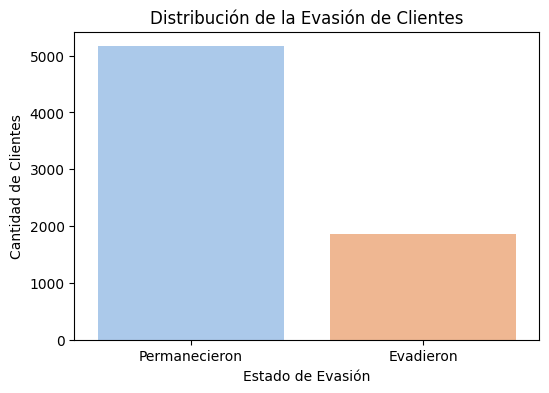

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de cada categoría en Evasion
counts = df_final['Evasion'].value_counts()

# Gráfico de barras simple
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette='pastel')
plt.xticks([0,1], ['Permanecieron', 'Evadieron'])
plt.title('Distribución de la Evasión de Clientes')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Estado de Evasión')
plt.show()


Recuento de evasión por variables categóricas

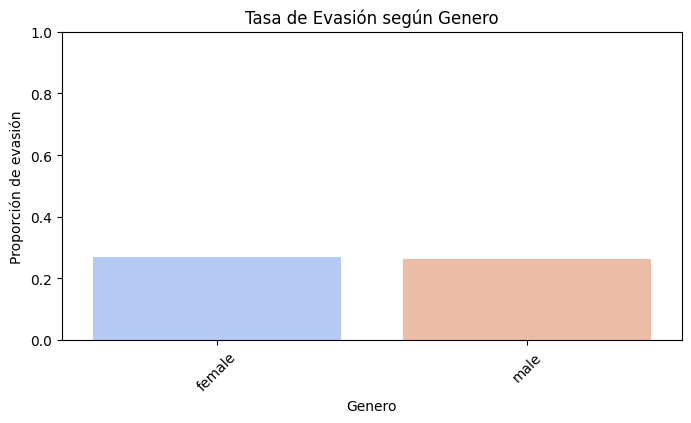

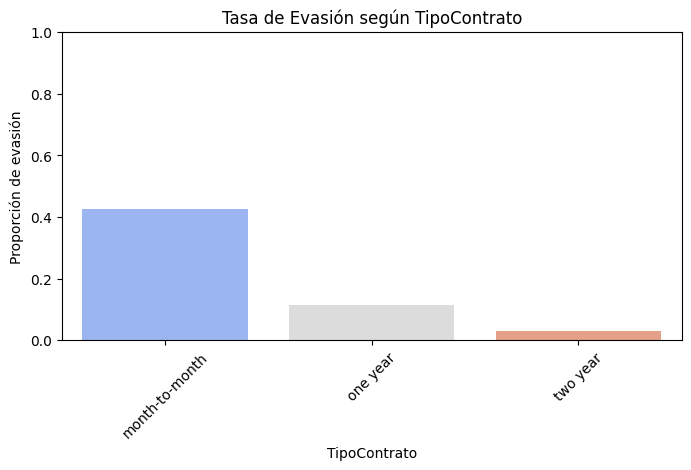

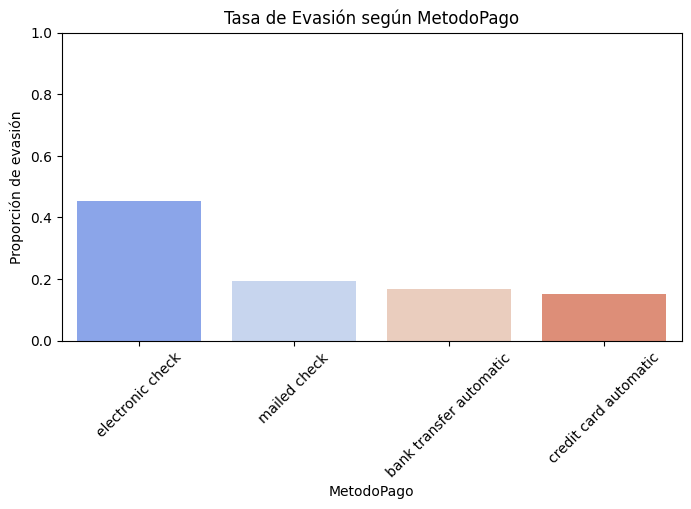

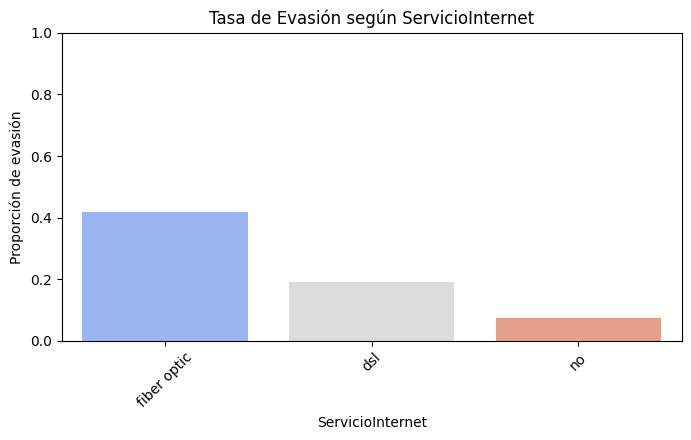

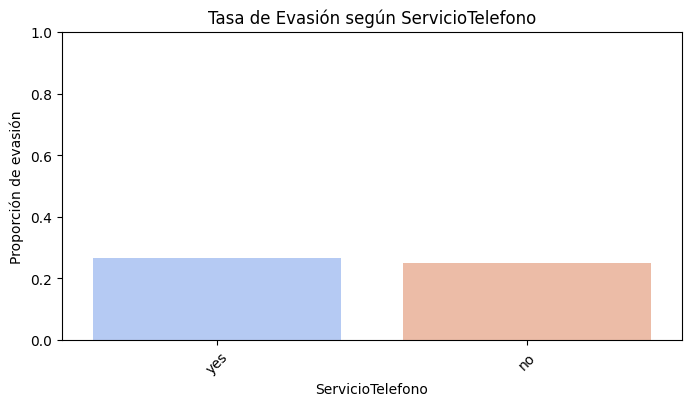

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables categóricas para analizar
cols_categoricas = ['Genero', 'TipoContrato', 'MetodoPago', 'ServicioInternet', 'ServicioTelefono']

for col in cols_categoricas:
    plt.figure(figsize=(8,4))
    # Calculamos la proporción de evasión por categoría
    prop = df_final.groupby(col)['Evasion'].mean().sort_values(ascending=False)

    sns.barplot(x=prop.index, y=prop.values, palette='coolwarm')
    plt.title(f'Tasa de Evasión según {col}')
    plt.ylabel('Proporción de evasión')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()


# Sección nueva

Conteo de evasión por variables numéricas

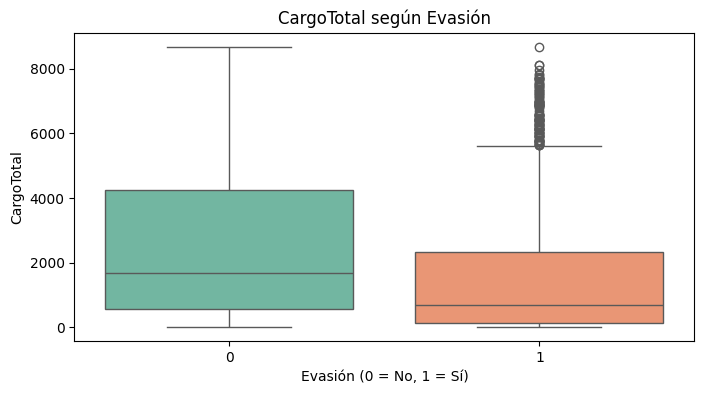

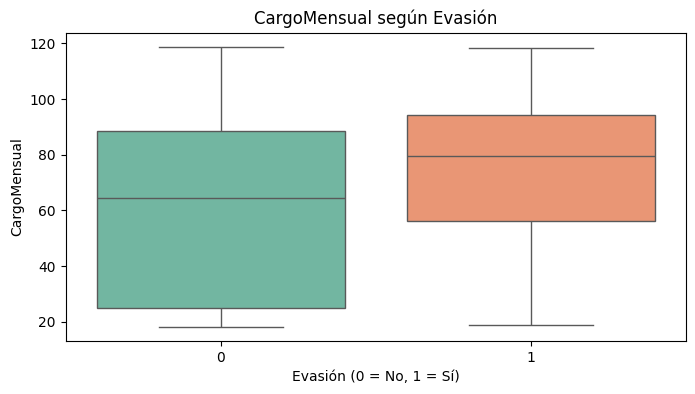

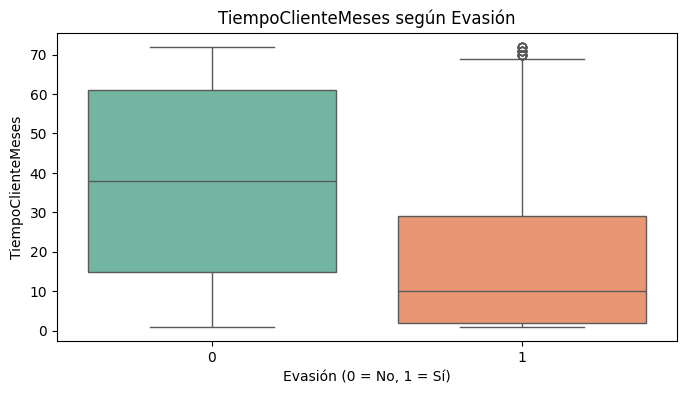

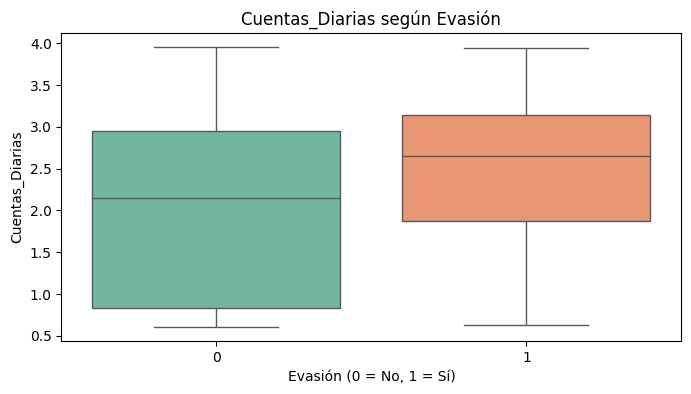

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_numericas = ['CargoTotal', 'CargoMensual', 'TiempoClienteMeses', 'Cuentas_Diarias']

for var in variables_numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Evasion', y=var, data=df_final, palette='Set2')
    plt.title(f'{var} según Evasión')
    plt.xlabel('Evasión (0 = No, 1 = Sí)')
    plt.ylabel(var)
    plt.show()


Informe final


### 1. Introducción

Este análisis tiene como objetivo entender las causas de la evasión de clientes (churn) en Telecom X.  
La evasión implica la pérdida de ingresos y clientes. A través del análisis de datos de facturación, servicios y características del cliente, se busca detectar patrones que permitan anticipar y reducir la pérdida de clientes.

---

### 2. Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos:

- Importación de los datos en formato JSON.
- Normalización de columnas anidadas como `account`, `customer`, `internet` y `phone`.
- Conversión de columnas como `Charges.Total` a tipo numérico.
- Eliminación de valores nulos y duplicados.
- Estándarización de variables categóricas (minúsculas, sin espacios).
- Conversión de la variable `Churn` a binaria (0 = no evasión, 1 = evasión).
- Creación de la columna `Cuentas_Diarias` como `Charges.Monthly / 30`.
- Renombrado de columnas a nombres más claros en español.

---

### 3. Análisis Exploratorio de Datos

- El 26.5% de los clientes abandonaron el servicio.
- Se observó mayor evasión entre:
  - Clientes con contratos mes a mes.
  - Clientes con método de pago `electronic check`.
  - Usuarios que no utilizan servicios adicionales como respaldo o soporte.
- Los clientes que evadieron suelen tener:
  - Menor tiempo como clientes.
  - Menor gasto total.
  - Cargos mensuales similares o un poco menores.

---

### 4. Conclusiones

- El contrato a corto plazo y la baja adopción de servicios adicionales están asociados a mayor evasión.
- Los métodos de pago menos automatizados también se vinculan con mayor tasa de abandono.
- La evasión se da más frecuentemente en clientes con menor antigüedad.

---

### 5. Recomendaciones

- Incentivar contratos más largos con descuentos o beneficios.
- Promover el uso de servicios adicionales como seguridad, soporte o respaldo.
- Monitorear a los clientes nuevos y con bajo gasto total.
- Facilitar métodos de pago más cómodos y seguros.
- Usar estos datos como base para crear un modelo predictivo de churn.


¡Extra! Análisis de correlación entre variables


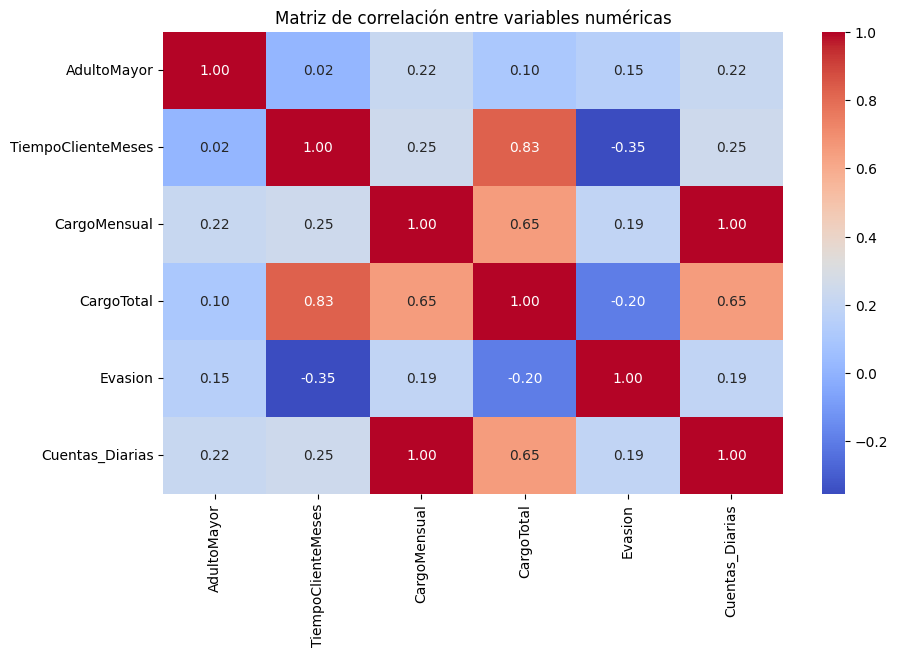

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo variables numéricas
corr_matrix = df_final.select_dtypes(include='number').corr()

# Mostramos la matriz
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


In [72]:
# Correlación entre todas las variables y Evasion (ordenadas)
print(corr_matrix['Evasion'].sort_values(ascending=False))


Evasion               1.000000
Cuentas_Diarias       0.192858
CargoMensual          0.192858
AdultoMayor           0.150541
CargoTotal           -0.199484
TiempoClienteMeses   -0.354049
Name: Evasion, dtype: float64


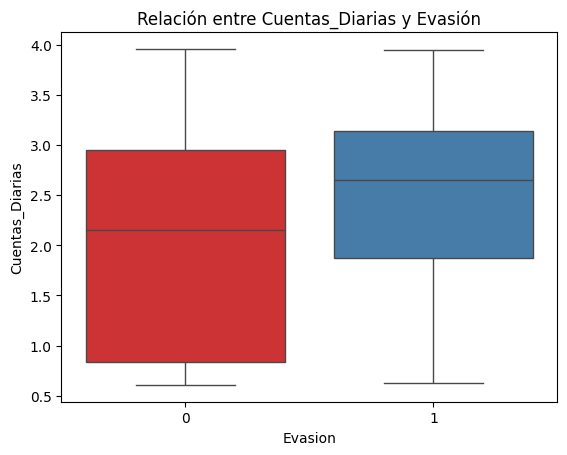

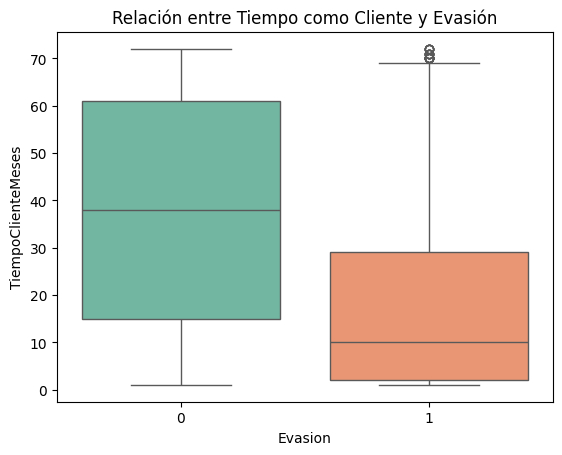

In [73]:
# Dispersión de Cuentas_Diarias vs Evasion
sns.boxplot(x='Evasion', y='Cuentas_Diarias', data=df_final, palette='Set1')
plt.title('Relación entre Cuentas_Diarias y Evasión')
plt.show()

# Dispersión de TiempoClienteMeses vs Evasion
sns.boxplot(x='Evasion', y='TiempoClienteMeses', data=df_final, palette='Set2')
plt.title('Relación entre Tiempo como Cliente y Evasión')
plt.show()
